In [21]:
from matplotlib import pyplot as plt
from IPython.core.interactiveshell import InteractiveShell

import os
import warnings
import pandas as pd

In [22]:
warnings.filterwarnings(action='ignore')
InteractiveShell.ast_node_interactivity = "all"

In [23]:
input_dir = '../Database/'
file = 'train.csv'
data = pd.read_csv(os.path.join(input_dir, file))
data['년'] = data['일시'].str.slice(0,4)
data['월'] = data['일시'].str.slice(5,7)
data['월일'] = data['일시'].str.slice(5)

In [24]:
benchmark=data['평균기온'][data['년']=='2022']
benchmark=benchmark.iloc[:358]

In [25]:
sub1 = pd.read_csv('../Files/bi_LSTM.csv')
sub2 = pd.read_csv('../Files/bi_LSTM_GRU.csv')
sub3 = pd.read_csv('../Files/LSTM.csv')
sub4 = pd.read_csv('../Files/LSTM_GRU.csv')
sub5 = pd.read_csv('../Files/seq2seq.csv')

Text(0.5, 1.0, 'Predicted avg_Temperature')

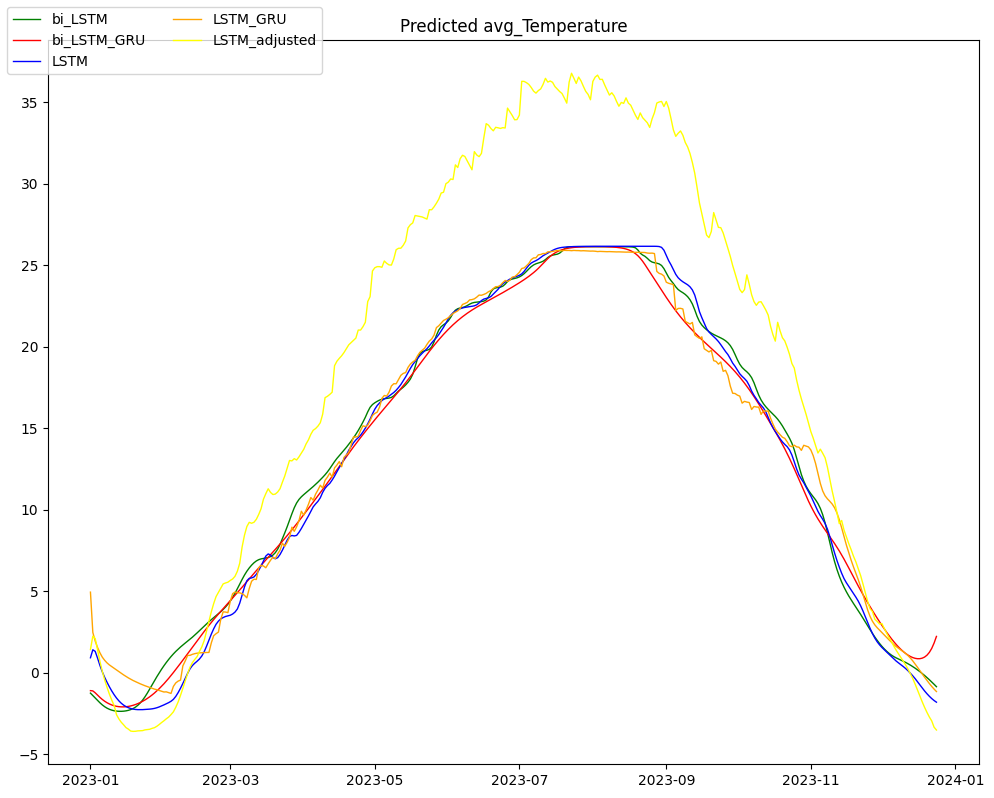

In [26]:
date_time = pd.to_datetime(sub1['Date'], format='%Y-%m-%d')
X = date_time
Y1 = sub1['avg_Temperature']
Y2 = sub2['avg_Temperature']
Y3 = sub3['avg_Temperature']
Y4 = sub4['avg_Temperature']
Y5 = sub3['adjusted_평균기온']

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(X, Y1, color="green", linewidth="1", label="bi_LSTM")
ax.plot(X, Y2, color="red", linewidth="1", label="bi_LSTM_GRU")
ax.plot(X, Y3, color="blue", linewidth='1', label="LSTM")
ax.plot(X, Y4, color="orange", linewidth='1', label="LSTM_GRU")
ax.plot(X, Y5, color="yellow", linewidth='1', label="LSTM_adjusted")
ax.set_title("Predicted avg_Temperature")

fig.tight_layout()
fig.legend(loc="upper left",ncol=2)
fig.show()

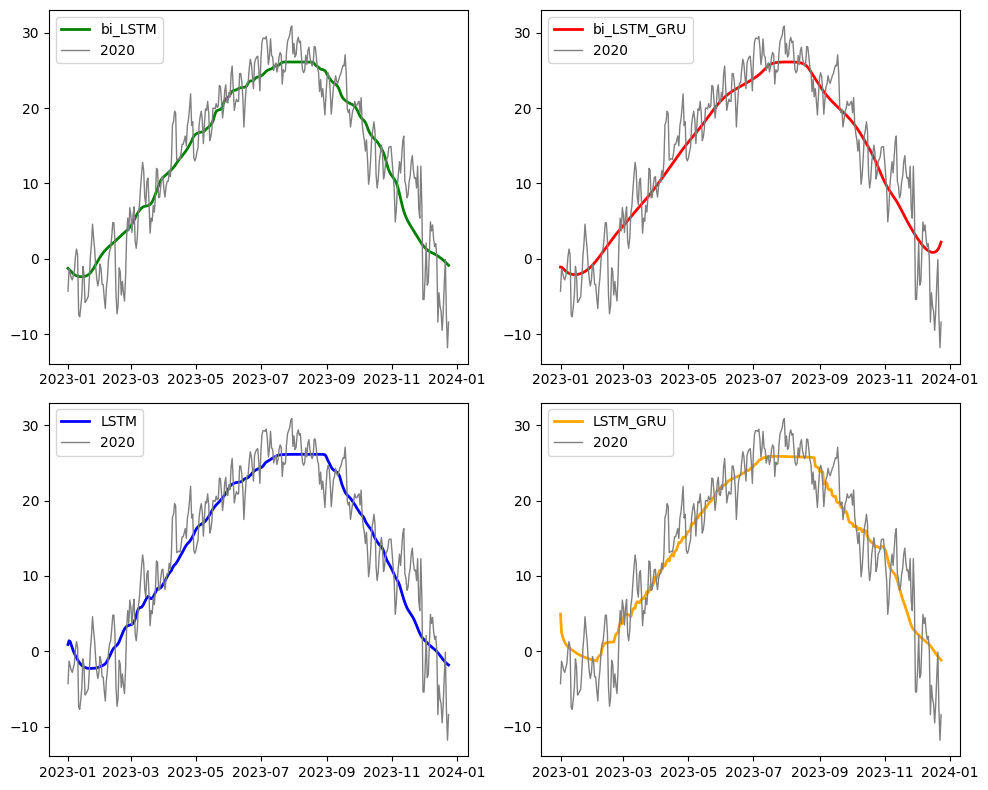

In [27]:
fig, axs = plt.subplots(2,2, figsize=(10,8))
axs[0, 0].plot(X, Y1, color="green", linewidth="2", label="bi_LSTM")
axs[0, 0].plot(X, benchmark, color="grey", linewidth="1", label="2020")
axs[0, 0].legend(loc="upper left")

axs[0, 1].plot(X, Y2, color="red", linewidth="2", label="bi_LSTM_GRU")
axs[0, 1].plot(X, benchmark, color="grey", linewidth="1", label="2020")
axs[0, 1].legend(loc="upper left")

axs[1, 0].plot(X, Y3, color="blue", linewidth="2", label="LSTM")
axs[1, 0].plot(X, benchmark, color="grey", linewidth="1", label="2020")
axs[1, 0].legend(loc="upper left")

axs[1, 1].plot(X, Y4, color="orange", linewidth="2", label="LSTM_GRU")
axs[1, 1].plot(X, benchmark, color="grey", linewidth="1", label="2020")
axs[1, 1].legend(loc="upper left")

fig.tight_layout()

fig.show()